In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk import FreqDist
from nltk import bigrams
from nrclex import NRCLex
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from collections import Counter

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Konrad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
# Loading preprocessed data
tweets = pd.read_csv(f'./data/tweets_clean.csv', converters={'text_clean_list': pd.eval, 'text_clean_stopwords': pd.eval, 'hashtags_list': pd.eval})
users = pd.read_csv(f'./data/users_clean.csv')

In [4]:
# Sentiment counting function
analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    return analyzer.polarity_scores(text)

In [5]:
# Applying get_sentiment function on a cleaned text data
tweets['sentiment'] = tweets.text_clean.apply(get_sentiment)

In [6]:
# Emotion detection function
def get_emotions(text):
    text_object = NRCLex(text)
    return text_object.raw_emotion_scores

In [7]:
# Applying get_emotions function on a cleaned text data
tweets['emotions'] = tweets.text_clean.apply(get_emotions)

In [8]:
# Displaying cleaned texts and corresponding emotion scores
tweets[['text_clean', 'sentiment']]

,text_clean,sentiment
0,how to identify a whitexican in qatar no resp...,"{'neg': 0.205, 'neu': 0.676, 'pos': 0.119, 'co..."
1,gillingham vs afc fylde pm whos going to wi...,"{'neg': 0.0, 'neu': 0.678, 'pos': 0.322, 'comp..."
2,derby vs torquay pm whos going to win,"{'neg': 0.0, 'neu': 0.648, 'pos': 0.352, 'comp..."
3,cambridge united vs curzon ashton pm whos g...,"{'neg': 0.0, 'neu': 0.548, 'pos': 0.452, 'comp..."
4,hartlepool vs solihull moors pm whos going ...,"{'neg': 0.0, 'neu': 0.678, 'pos': 0.322, 'comp..."
...,...,...
129719,the coronation of the true living ens ada f...,"{'neg': 0.0, 'neu': 0.797, 'pos': 0.203, 'comp..."
129720,peter drury on argentina s winning moment,"{'neg': 0.0, 'neu': 0.638, 'pos': 0.362, 'comp..."
129721,argentine dairy industry,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
129722,this time argentina quack wool chz ltc v...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [9]:
# Labeled sentiment plot function
def plot_sentiment_pie(column):
    sentiment_count = {'positive' : 0, 'neutral' : 0, 'negative' : 0}

    for sentiment in column:
        if sentiment['compound'] >= 0.1:
            sentiment_count['positive'] += 1
        elif sentiment['compound'] <= -0.1:
            sentiment_count['negative'] += 1
        else:
            sentiment_count['neutral'] += 1

    fig, ax = plt.subplots()
    ax.pie(sentiment_count.values(), labels=sentiment_count.keys(), autopct='%1.1f%%')

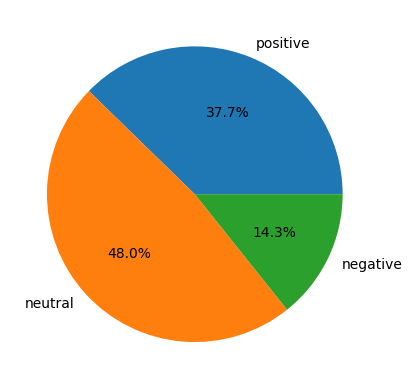

In [10]:
# Plotting labeled sentiments for a tweets set
plot_sentiment_pie(tweets.sentiment)

In [11]:
# Distinguishing tweets with a very positive sentiment score
tweets_pos = tweets.loc[tweets.sentiment.apply(lambda row : row['compound'] >= 0.8)]

In [12]:
# Displaying highly positive tweet texts and corresponding sentiment scores
tweets_pos[['text_clean', 'sentiment']]

,text_clean,sentiment
99,when countries use their one love arm band whe...,"{'neg': 0.0, 'neu': 0.713, 'pos': 0.287, 'comp..."
128,viba joins the world in celebrating the beauti...,"{'neg': 0.0, 'neu': 0.479, 'pos': 0.521, 'comp..."
157,i would love it if kane wore his armband and t...,"{'neg': 0.0, 'neu': 0.704, 'pos': 0.296, 'comp..."
184,this was amazing to watch so much respect fo...,"{'neg': 0.0, 'neu': 0.605, 'pos': 0.395, 'comp..."
188,eve in qatar fifa eve fifa special iran ...,"{'neg': 0.0, 'neu': 0.682, 'pos': 0.318, 'comp..."
...,...,...
129684,congrats to argentina and to the goat lionel m...,"{'neg': 0.0, 'neu': 0.725, 'pos': 0.275, 'comp..."
129694,an explosion of joy as argentina wins the worl...,"{'neg': 0.0, 'neu': 0.516, 'pos': 0.484, 'comp..."
129705,congrats to argentina and to the goat lionel m...,"{'neg': 0.0, 'neu': 0.725, 'pos': 0.275, 'comp..."
129713,congrats to argentina and to the goat lionel m...,"{'neg': 0.0, 'neu': 0.725, 'pos': 0.275, 'comp..."


In [13]:
# Wordcloud plot function
def plot_wordcloud(column):
    wordlist = [word for words in column for word in words]

    fdist_words = FreqDist(wordlist)

    wc = WordCloud(width=1000, height=800, max_words=100).generate_from_frequencies(fdist_words)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

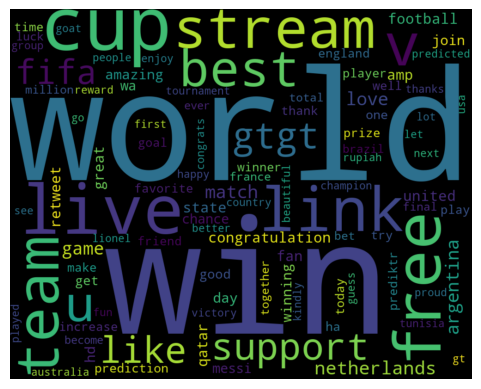

In [14]:
# Plotting wordcloud of a clean text from tweets_pos
plot_wordcloud(tweets_pos.text_clean_stopwords)

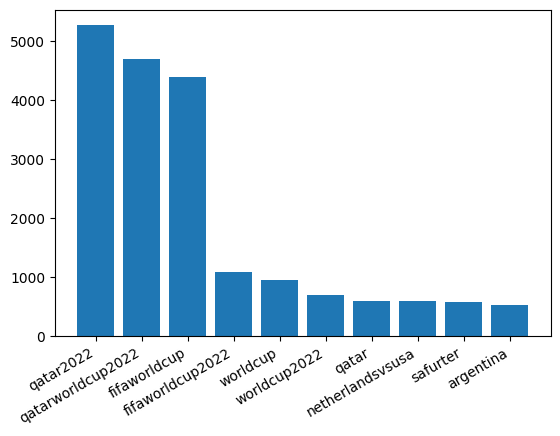

In [15]:
# Plotting the most frequent hashtags from tweets_pos
hashtags_pos = [hashtag for hashtags in tweets_pos.hashtags_list for hashtag in hashtags]
hashtags_pos_freq = {v : k for v, k in Counter(hashtags_pos).most_common(10)}

plt.bar(hashtags_pos_freq.keys(), hashtags_pos_freq.values())
plt.gcf().autofmt_xdate()

In [16]:
# Obtaining bigrams of tweets_pos
bigram_pos = pd.Series([word for sublist in
                        tweets_pos.text_clean_stopwords
                            .apply(lambda x : [i for i in bigrams(x)])
                            .tolist() for word in sublist]).value_counts()

<AxesSubplot: >

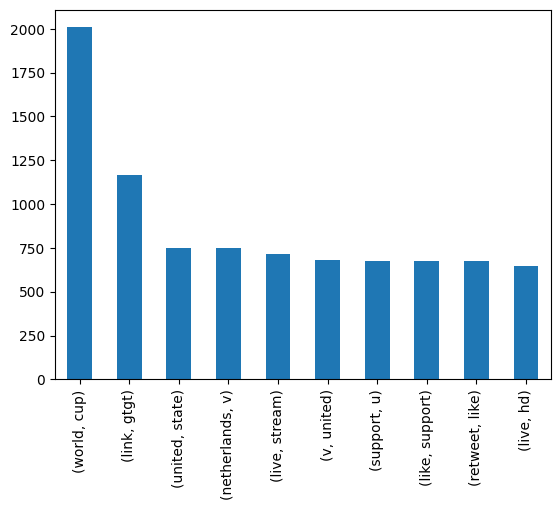

In [17]:
# Plotting bigrams
bigram_pos[:10].plot(kind='bar')

In [18]:
# Grouping texts from tweets_pos
tweets_pos.groupby(['text_clean']).size().sort_values(ascending=False)

text_clean
  live hd stream   netherlands vs united states   free  live stream       link  gtgt link  gtgt retweet    like    to support us                                                                       511
 support your favorite team and win total millions of rupiah prizes become a that should be together join now                                                                                          270
make the best of the world cup increase your winning chances with predictions by prediktr try for days for free                                                                                        137
 for the glory of fifa the true fans of the league get all your friends to join with us in this amazing community fifan token from fifa fans for fifa fans                                             116
   fifa world cup  is here and so it s time for chippercash football lovers to stay entertained and win lots of giveaway  kindly login and claim your reward congratulations     

In [19]:
# Distinguishing tweets with a very negative sentiment score
tweets_neg = tweets.loc[tweets.sentiment.apply(lambda row : row['compound'] <= -0.6)]

In [20]:
# Sample of negative tweets with corresponding sentiment scores
tweets_neg[['text_clean', 'sentiment']]

,text_clean,sentiment
37,protesters who came to the street in today ...,"{'neg': 0.268, 'neu': 0.732, 'pos': 0.0, 'comp..."
38,irans football team does not represent the pe...,"{'neg': 0.336, 'neu': 0.664, 'pos': 0.0, 'comp..."
45,at this very moment people of iran are being ...,"{'neg': 0.279, 'neu': 0.639, 'pos': 0.082, 'co..."
47,western politics amp media have shown such sha...,"{'neg': 0.37, 'neu': 0.546, 'pos': 0.084, 'com..."
49,if it wasn t for money having the loudest voic...,"{'neg': 0.132, 'neu': 0.831, 'pos': 0.038, 'co..."
...,...,...
129424,best ever except for abuse of women abuse of ...,"{'neg': 0.379, 'neu': 0.469, 'pos': 0.152, 'co..."
129427,best ever except for abuse of women abuse of ...,"{'neg': 0.379, 'neu': 0.469, 'pos': 0.152, 'co..."
129439,to burn the west with the fire of hatred and h...,"{'neg': 0.362, 'neu': 0.638, 'pos': 0.0, 'comp..."
129468,france lost but was never a pushed over team w...,"{'neg': 0.238, 'neu': 0.762, 'pos': 0.0, 'comp..."


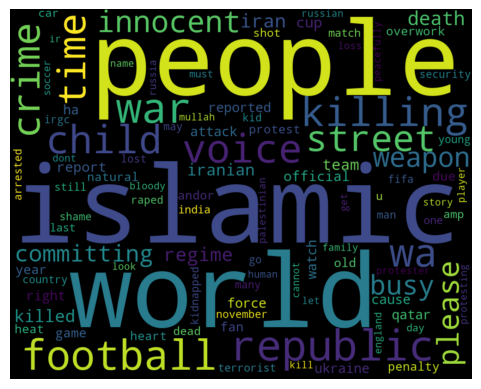

In [21]:
# Plotting most common words from negative tweets
plot_wordcloud(tweets_neg.text_clean_stopwords)

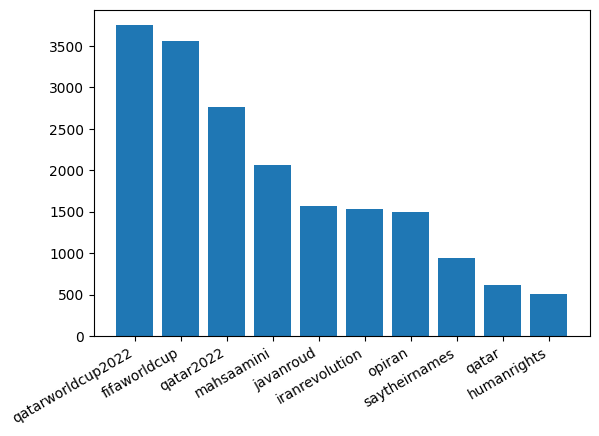

In [22]:
# Plotting the most frequent hashtags from negative tweets
hashtags_neg = [hashtag for hashtags in tweets_neg.hashtags_list for hashtag in hashtags]
hashtags_neg_freq = {v : k for v, k in Counter(hashtags_neg).most_common(10)}

plt.bar(hashtags_neg_freq.keys(), hashtags_neg_freq.values())
plt.gcf().autofmt_xdate()

In [23]:
# Getting bigrams of negative tweets
bigram_neg = pd.Series([word for sublist in
                        tweets_neg.text_clean_stopwords
                            .apply(lambda x : [i for i in bigrams(x)])
                            .tolist() for word in sublist]).value_counts()

<AxesSubplot: >

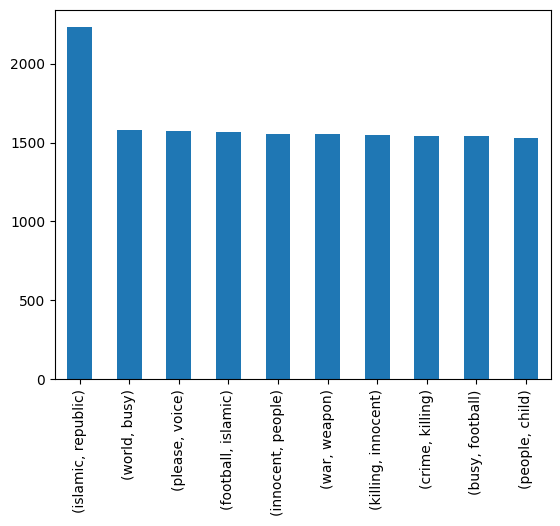

In [24]:
# Plotting bigrams
bigram_neg[:10].plot(kind='bar')

In [25]:
# Grouping texts from negative tweets
tweets_neg.groupby(['text_clean']).size().sort_values(ascending=False)

text_clean
 at this time when the world is busy with football  the islamic republic is committing crimes and killing innocent people and children with a war weapons in the street  please be our voice                                                                          1042
 unbelievable   a young iranian man was shot dead in his car in after the mullah team lost in to usahis crime was beeping in his car peacefully  his last story still is up on his profile  this regime must go                                                        103
 her name is  shes only  she was kidnapped by irgc thugs and they raped her so many times that she was brought to a hospital only to be kidnapped again i cannot watch soccer while our kids are being raped                                                            72
 a singer from kermanshah who was arrested by the security forces during protests in iran was accused in the court and he may be executed by the regime during his detention he was subjecte

In [26]:
# Extracting tweets related to Iran
hashtags_iran = ['mahsaamini', 'javanroud', 'iranrevolution', 'saytheirnames', 'opiran']
tweets_iran = tweets.loc[tweets.apply(lambda row : any(hashtag in row.hashtags_list for hashtag in hashtags_iran), axis=1)]

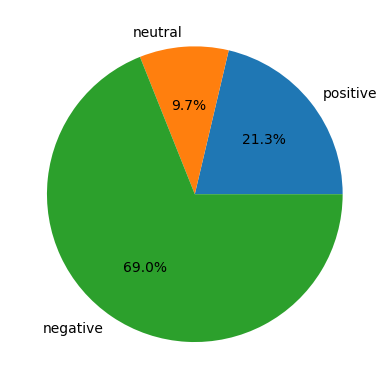

In [27]:
# Plotting labeled sentiments for Iran related tweets
plot_sentiment_pie(tweets_iran.sentiment)

In [28]:
# Grouping texts from Iran related tweets
tweets_iran.groupby(['text_clean']).size().sort_values(ascending=False)

text_clean
 at this time when the world is busy with football  the islamic republic is committing crimes and killing innocent people and children with a war weapons in the street  please be our voice                     1041
 be our voice                                                                                                                                                                                                      77
  save us from khamenei  raisi and basijis  disgusted by your silence       down with regime lobbies                                                                                                               76
 her name is  shes only  she was kidnapped by irgc thugs and they raped her so many times that she was brought to a hospital only to be kidnapped again i cannot watch soccer while our kids are being raped       72
  save women from khamenei  raisi and basijis  disgusted by your silence       down with regime lobbies                              

In [29]:
tweets_iran.loc[tweets_iran.sentiment.apply(lambda row : row['compound'] >= 0.1)]

,hashtag,id,author_id,text,like_count,reply_count,retweet_count,quote_count,created_at,lang,mentions,text_clean,text_clean_list,text_clean_stopwords,hashtags_list,sentiment,emotions
90,#QatarWorldCup2022,1594638513609531393,1548688313846239233,@England Wear the armband! 🏳️‍🌈 #LGBTQ \nSuppo...,0,0,0,0,2022-11-21 10:27:03+00:00,en,['1903382054'],wear the armband support iranian women w...,"[wear, the, armband, support, iranian, woman, ...","[wear, armband, support, iranian, woman, woman...","[lgbtq, mahsaamini, qatarworldcup2022, fifawor...","{'neg': 0.0, 'neu': 0.504, 'pos': 0.496, 'comp...","{'negative': 1, 'trust': 2, 'joy': 1, 'positiv..."
128,#QatarWorldCup2022,1594638296751095808,1539516874576130054,Viba joins the world in celebrating the beauti...,0,0,0,0,2022-11-21 10:26:11+00:00,en,NaN,viba joins the world in celebrating the beauti...,"[viba, join, the, world, in, celebrating, the,...","[viba, join, world, celebrating, beautiful, game]","[fifaworldcup, openingceremonyworldcup2022, qa...","{'neg': 0.0, 'neu': 0.479, 'pos': 0.521, 'comp...","{'anticipation': 1, 'joy': 2, 'positive': 2}"
220,#QatarWorldCup2022,1594637638409109506,1093801674848784384,"For women, life, freedom #sayTheirName\n#mahsa...",0,0,0,0,2022-11-21 10:23:34+00:00,en,NaN,for women life freedom,"[for, woman, life, freedom]","[woman, life, freedom]","[saytheirname, mahsaamini, qatarworldcup2022]","{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'comp...","{'joy': 1, 'positive': 1, 'trust': 1}"
230,#QatarWorldCup2022,1594637596033957888,1571092774316900352,@FIFAWorldCup #Infantino #FIFA Where is your s...,0,0,0,0,2022-11-21 10:23:24+00:00,en,['138372303'],where is your statement about violence the o...,"[where, is, your, statement, about, violence, ...","[statement, violence, side, persian, gulf, soc...","[infantino, fifa, iran, nowlive, fifaworldcup,...","{'neg': 0.121, 'neu': 0.706, 'pos': 0.173, 'co...","{'positive': 4, 'trust': 4, 'anger': 2, 'fear'..."
250,#QatarWorldCup2022,1594637434268286977,1573211031106686976,@FIFAWorldCup Alireza Jahanbakhsh is ready to ...,0,0,0,0,2022-11-21 10:22:45+00:00,en,['138372303'],alireza jahanbakhsh is ready to ignore the bl...,"[alireza, jahanbakhsh, is, ready, to, ignore, ...","[alireza, jahanbakhsh, ready, ignore, blood, d...","[qatarworldcup2022, fifaworldcup, mahsaamini]","{'neg': 0.081, 'neu': 0.749, 'pos': 0.169, 'co...","{'anticipation': 1, 'negative': 2}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117797,#Qatar2022,1599517891011162112,2888353102,🇬🇧#British 🇬🇧✅ Sign Share Public display \n🔴Re...,0,0,0,0,2022-12-04 21:35:57+00:00,en,NaN,sign share public display rest of shar...,"[sign, share, public, display, rest, of, share...","[sign, share, public, display, rest, share, so...","[british, مهسا_امینی, اعتصابات_سراسری, qatar20...","{'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'comp...","{'anticipation': 3, 'joy': 2, 'positive': 4, '..."
117801,#Qatar2022,1599517856101593088,2888353102,🇬🇧#British 🇬🇧✅ Sign Share Public display \n🔴Re...,0,0,0,0,2022-12-04 21:35:49+00:00,en,NaN,sign share public display rest of shar...,"[sign, share, public, display, rest, of, share...","[sign, share, public, display, rest, share, so...","[british, مهسا_امینی, اعتصابات_سراسری, qatar20...","{'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'comp...","{'anticipation': 3, 'joy': 2, 'positive': 4, '..."
118964,#QatarWorldCup2022,1605210290056204288,1522834921726922753,CBN Governor Emefiele was suspected of corrupt...,0,0,0,0,2022-12-20 14:35:31+00:00,en,NaN,cbn governor emefiele was suspected of corrupt...,"[cbn, governor, emefiele, wa, suspected, of, c...","[cbn, governor, emefiele, wa, suspected, corru...","[nysc, iranrevolution, freennamdikanu, fifawor...","{'neg': 0.081, 'neu': 0.641, 'pos': 0.278, 'co...","{'trust': 3, 'disgust': 1, 'negative': 1, 'ant..."
121371,#QatarWorldCup2022,1604720293100294144,1580980800773726208,@1mfati @Persian_Ahura This is what she tweete...,2,0,0,0,2022-12-19 06:08:26+00:00,en,"['141108471030

In [43]:
# Saving users related to Iran
users_iran = users[users.id.isin(tweets_iran.author_id)]
users_iran.to_csv('./data/users_iran.csv', index=False)

In [30]:
# Extracting tweets related to Ukraine
hashtags_ukraine = ['ukraine', 'russia', 'stop_war', 'ukrainerussiawar', 'war']
tweets_ukraine = tweets.loc[tweets.apply(lambda row : any(hashtag in row.hashtags_list for hashtag in hashtags_ukraine), axis=1)]

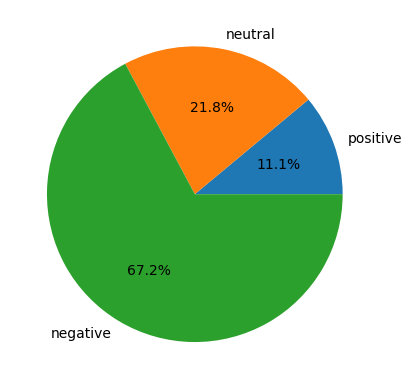

In [31]:
# Plotting labeled sentiments for Ukraine related tweets
plot_sentiment_pie(tweets_ukraine.sentiment)

In [32]:
# Grouping texts from Ukraine related tweets
tweets_ukraine.groupby(['text_clean']).size().sort_values(ascending=False)

text_clean
 the bloody zionist occupation shoots in cold blood a civilian palestinian  years old in in  any condemnation oh well this is not     36
 davido and chioma are under spiritual attack click on the blue link   to watch ghana ronaldo bella the clout                         20
 davido and chioma are under spiritual attack click on the blue link   to watch ghana ronaldo bella the clout asamoah gyan            20
 davido and chioma are under spiritual attack click on the blue link   to watch ghana ronaldo bella the clout asamoah gyan gtbank     19
ukraine russia war footage today graphic intense rare combat footage from ukraine russia war                                          12
                                                                                                                                      ..
russia continues to hide the real death toll of its servicemen while more troops are sent to ukraine                                   1
russia deploys its latest elec

In [33]:
tweets_ukraine.loc[tweets_ukraine.sentiment.apply(lambda row : row['compound'] >= 0.1)]

,hashtag,id,author_id,text,like_count,reply_count,retweet_count,quote_count,created_at,lang,mentions,text_clean,text_clean_list,text_clean_stopwords,hashtags_list,sentiment,emotions
3859,#FIFAWorldCup,1594637023700213761,1463283936931430408,Ukraine war: Zelenskyy tells soldiers ‘we are ...,0,0,0,0,2022-11-21 10:21:08+00:00,en,NaN,ukraine war zelenskyy tells soldiers we are m...,"[ukraine, war, zelenskyy, tell, soldier, we, a...","[ukraine, war, zelenskyy, tell, soldier, movin...","[ukraine, germany, fifaworldcup, canada, donbas]","{'neg': 0.187, 'neu': 0.526, 'pos': 0.287, 'co...","{'fear': 1, 'negative': 1, 'positive': 2, 'ant..."
4287,#FIFAWorldCup,1594635944161837057,1587111210809442304,Peace Movement in Action Peace Voices from Rus...,0,0,0,0,2022-11-21 10:16:50+00:00,en,NaN,peace movement in action peace voices from rus...,"[peace, movement, in, action, peace, voice, fr...","[peace, movement, action, peace, voice, russia...","[ukraine, germany, fifaworldcup, canada, donbas]","{'neg': 0.0, 'neu': 0.533, 'pos': 0.467, 'comp...","{'anticipation': 2, 'joy': 2, 'positive': 3, '..."
4410,#FIFAWorldCup,1594635624618885121,1587111210809442304,"""Now is the time to make peace in Ukraine"" | ...",0,0,0,0,2022-11-21 10:15:34+00:00,en,NaN,now is the time to make peace in ukraine live...,"[now, is, the, time, to, make, peace, in, ukra...","[time, make, peace, ukraine, live, debate]","[ukraine, germany, fifaworldcup, canada, donbas]","{'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'comp...","{'anticipation': 2, 'joy': 1, 'positive': 2, '..."
4468,#FIFAWorldCup,1594635469983195136,1578881382398443520,Ukraine war: Zelenskyy tells soldiers ‘we are ...,0,0,0,0,2022-11-21 10:14:57+00:00,en,NaN,ukraine war zelenskyy tells soldiers we are m...,"[ukraine, war, zelenskyy, tell, soldier, we, a...","[ukraine, war, zelenskyy, tell, soldier, movin...","[ukraine, germany, fifaworldcup, canada, donbas]","{'neg': 0.187, 'neu': 0.526, 'pos': 0.287, 'co...","{'fear': 1, 'negative': 1, 'positive': 2, 'ant..."
5559,#QatarWorldCup2022,1594605756145360897,1206879133978038272,Great vlog by George on Biden and worldcup\n\n...,0,0,0,0,2022-11-21 08:16:53+00:00,en,NaN,great vlog by george on biden and worldcup,"[great, vlog, by, george, on, biden, and, worl...","[great, vlog, george, biden, worldcup]","[qatarworldcup2022, qatar2022, qatar, ukraine,...","{'neg': 0.0, 'neu': 0.631, 'pos': 0.369, 'comp...",{}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125811,#Qatar2022,1605251658916958211,1603711724841861122,#TerryHallRIP Rwanda #Christmas #FIFAWorldCup ...,0,0,0,0,2022-12-20 17:19:54+00:00,en,NaN,rwanda goat martinez happy hanukkah maradona ...,"[rwanda, goat, martinez, happy, hanukkah, mara...","[rwanda, goat, martinez, happy, hanukkah, mara...","[terryhallrip, christmas, fifaworldcup, ukrain...","{'neg': 0.0, 'neu': 0.619, 'pos': 0.381, 'comp...","{'anticipation': 1, 'joy': 1, 'positive': 1, '..."
125813,#Qatar2022,1605251607850913792,1603711724841861122,#TerryHallRIP Rwanda #Christmas #FIFAWorldCup ...,0,0,0,0,2022-12-20 17:19:42+00:00,en,NaN,rwanda goat martinez happy hanukkah maradona ...,"[rwanda, goat, martinez, happy, hanukkah, mara...","[rwanda, goat, martinez, happy, hanukkah, mara...","[terryhallrip, christmas, fifaworldcup, ukrain...","{'neg': 0.0, 'neu': 0.619, 'pos': 0.381, 'comp...","{'anticipation': 1, 'joy': 1, 'positive': 1, '..."
125823,#Qatar2022,1605250872971186176,1603711724841861122,#TerryHallRIP Rwanda #Christmas #FIFAWorldCup ...,0,0,0,0,2022-12-20 17:16:46+00:00,en,NaN,rwanda goat martinez happy hanukkah,"[rwanda, goat, martinez, happy, hanukkah]","[rwanda, goat, martinez, happy, hanukkah]","[terryhallrip, christmas, fifaworldcup, ukrain...","{'neg': 0.0, 'neu': 0.519, 'pos': 0.481, 'comp...","{'anticipation': 1, 'joy': 1, 'positive': 1, '..."
126599,#Qatar2022,1605210155473313795,1581756660804198403,Why did FIFA reject Zelensky's request to shar...,0,1,0,0,2022-12-20 14:34:59+00:00,en,NaN,why did fifa reject zelen

In [34]:
# Emotion frequency count function
emotions = ['joy', 'positive', 'anticipation', 'trust', 'anger', 'disgust', 'negative', 'sadness', 'fear', 'surprise']

def get_emotion_freq(column):
    emotion_count = {emotion : 0 for emotion in emotions}

    for row in column:
        for emotion in row.keys():
            emotion_count[emotion] += row[emotion]

    return {emotion : freq / sum(emotion_count.values(), 0.0) for emotion, freq in emotion_count.items()}

In [35]:
# Getting emotion frequency from all tweets, Iran related and Ukraine related
tweet_emotion_freq = get_emotion_freq(tweets.emotions)
tweet_iran_emotion_freq = get_emotion_freq(tweets_iran.emotions)
tweet_ukraine_emotion_freq = get_emotion_freq(tweets_ukraine.emotions)

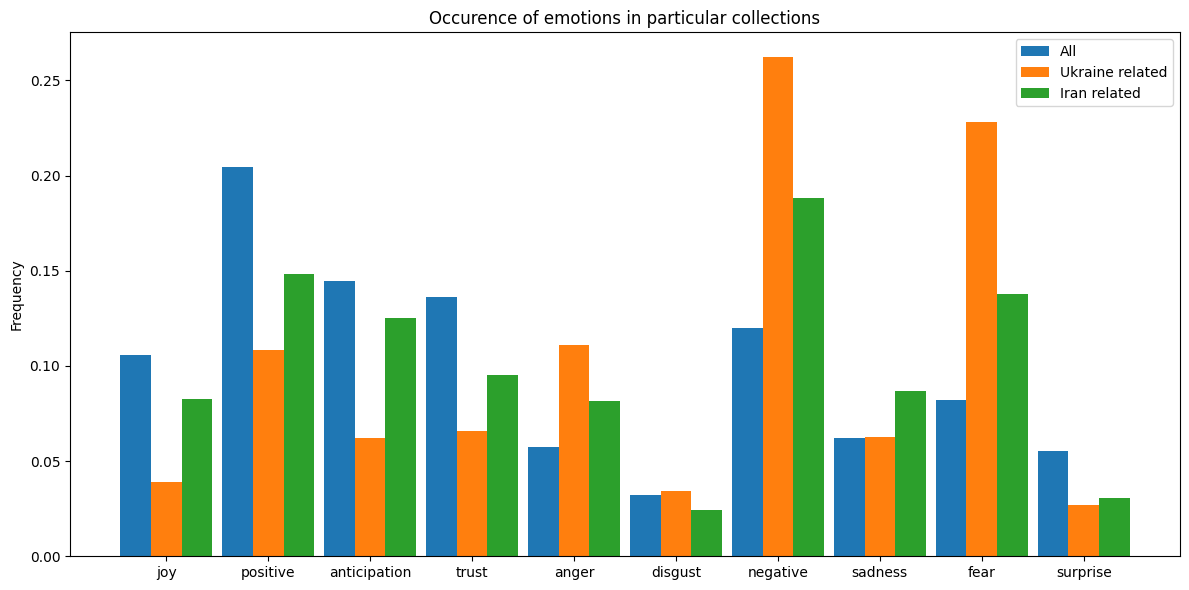

In [36]:
# Plotting emotion frequency for all tweets, Iran related and Ukraine related
x = np.arange(len(emotions))
width = 0.3

fig, ax = plt.subplots(figsize=(12, 6))

rects1 = ax.bar(x - width, tweet_emotion_freq.values(), width, label='All')
rects2 = ax.bar(x, tweet_ukraine_emotion_freq.values(), width, label='Ukraine related')
rects3 = ax.bar(x + width, tweet_iran_emotion_freq.values(), width, label='Iran related')

ax.set_ylabel('Frequency')
ax.set_title('Occurence of emotions in particular collections')
ax.set_xticks(x, emotions)
ax.legend()

fig.tight_layout()

In [37]:
# Loading users with assigned communities
users_community = pd.read_csv(f'./data/users-with-communities.csv')

In [38]:
# Displaying a sample of users
users_community.head()

,id,username,created_at,followers_count,following_count,tweet_count,protected,verified,community_number
0,230186918,alam_Newz,2010-12-24 14:51:40+00:00,5117,4018,28124,False,False,0
1,2429620166,Drkalsulaiti,2014-04-06 00:21:29+00:00,64189,527,20573,False,False,0
2,353032173,kataraqatar,2011-08-11 13:06:05+00:00,420929,1,59777,False,True,0
3,704275542648819712,roadto2022en,2016-02-29 12:02:29+00:00,1263911,45,2326,False,True,0
4,1567884749498204160,Roadto2022Go,2022-09-08 14:38:09+00:00,25706,50,225,False,True,0


In [39]:
# Checking the number of communities
users_community.community_number.unique()

array([0, 1, 2, 3], dtype=int64)

In [40]:
# Extracting tweets related to each of community
tweets_c1 = tweets[tweets.author_id.isin(users_community[users_community.community_number == 0].id)]
tweets_c2 = tweets[tweets.author_id.isin(users_community[users_community.community_number == 1].id)]
tweets_c3 = tweets[tweets.author_id.isin(users_community[users_community.community_number == 2].id)]
tweets_c4 = tweets[tweets.author_id.isin(users_community[users_community.community_number == 3].id)]

In [41]:
# Getting emotion frequency for each community
tweet_c1_emotion_freq = get_emotion_freq(tweets_c1.emotions)
tweet_c2_emotion_freq = get_emotion_freq(tweets_c2.emotions)
tweet_c3_emotion_freq = get_emotion_freq(tweets_c3.emotions)
tweet_c4_emotion_freq = get_emotion_freq(tweets_c4.emotions)

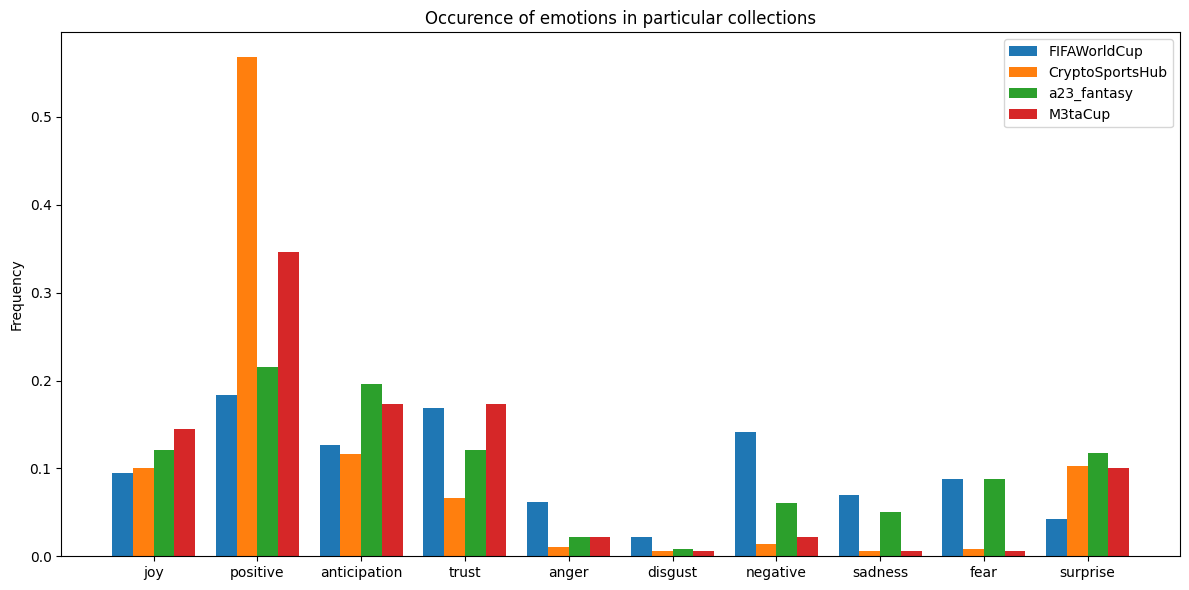

In [42]:
# Plotting emotion frequency for each community
x = np.arange(len(emotions))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 6))

rects1 = ax.bar(x - 1.5*width, tweet_c1_emotion_freq.values(), width, label='FIFAWorldCup')
rects2 = ax.bar(x - 0.5*width, tweet_c2_emotion_freq.values(), width, label='CryptoSportsHub')
rects3 = ax.bar(x + 0.5*width, tweet_c3_emotion_freq.values(), width, label='a23_fantasy')
rects4 = ax.bar(x + 1.5*width, tweet_c4_emotion_freq.values(), width, label='M3taCup')

ax.set_ylabel('Frequency')
ax.set_title('Occurence of emotions in particular collections')
ax.set_xticks(x, emotions)
ax.legend()

fig.tight_layout()